# COGS 108 - Final Project 

# Overview

Health inspections are important in providing outside incentive for restaurants to stay clean and maintain healthy practices in their kitchens and dining areas. Each restaurant is given a score by an individual inspector and that score is public information so people know what restaurants are up to code. I went through 18466 health inspections and analyzed the differences in scoring by each of the 32 health inspectors in the dataset.

# Name & PID

- Name: Parth Shah
- PID: A14071974

# Research Question

Do different health inspectors have different average scores, thus resulting in a lack of consistency in health inspections?

## Background and Prior Work

Health inspections in San diego County are carried out by Registered Environmental Health Specialists and their ratings are decided using the following system: every restaurant starts with 100 points and loses 4 points for every major risk factor, 2 points for every minor risk factor, and 1 point for every missing good retail practice. A grade is then given based on the points remaining after the inspection is complete with 90+ = A, 80-90 = B, 79- = C where C is a failing grade (1).



References:
- 1)“SD Food Info.” SD Food Info Start Search, www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html.

# Hypothesis


I predict that there will be some variation in the average score for each health inpspector. More specifically, that the range of average scores of health inspectors will be greater than 10 but less than 20, meaning that the most lenient inspector and most strict inspector will give an average grade that is an entire letter crage apart at least.

# Dataset(s)

Dataset Name: inspections.csv

Link to the dataset: https://canvas.ucsd.edu/courses/12630/files/1639871/download?wrap=1

Number of observations:18466

This dataset includes a lot of information about the health inspections such as date, score, name, etc. The inspector_id and score columns were especially helpful in determining the average given score for each inspector.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

inspect_df = pd.read_csv('/home/pcs003/inspections.csv')

# Data Cleaning

In [2]:
df = inspect_df[['inspector_id','score']]

For my purposes I only need the date, name, address, inspector_id, and score columns

Next I will clean the data further and create an array with a datafram for each of the 32 inspectors so I can get their individual data. While doing so I will create an array containing the A's, B's, and C's for each inspector so that I can further analyze their grading tendencies.

In [3]:
num_inspectors = int(df['inspector_id'].max())
inspectors = [None]*num_inspectors
average_scores = [None]*num_inspectors
As = [None]*num_inspectors
Bs = [None]*num_inspectors
Cs = [None]*num_inspectors
indices = [None]*num_inspectors

for i in range(num_inspectors):
    inspectors[i] = df[df['inspector_id'] == i+1]
    average_scores[i] = inspectors[i]['score'].mean(skipna = True)
    test = inspectors[i]
    As[i] = test[test['score'] >= 90]
    test2 = test[test['score'] < 90]
    Bs[i] = test2[test2['score'] >= 80]
    Cs[i] = test[test['score'] < 80]
    indices[i] = i + 1

Now I will take the dataframes that have been separated by grade range (i.e. A's, B's, and C's) and I will count the number of each grade that each inspector has given and store it in an array. It is important to note that the index that refers to a specific inspector id will be off by 1 as inspector 32 will be stored at index 31 since indexing starts at 0.

In [4]:
num_As = [None]*num_inspectors
num_Bs = [None]*num_inspectors
num_Cs = [None]*num_inspectors

for i in range(num_inspectors):
    num_As[i] = len(As[i]['score'])
    num_Bs[i] = len(Bs[i]['score'])
    num_Cs[i] = len(Cs[i]['score'])

# Data Analysis & Results

<BarContainer object of 32 artists>

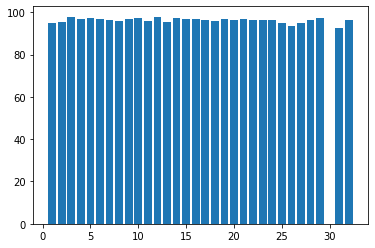

In [5]:
plot.bar(indices, average_scores)

You will notice that the bar graph with the average scores of each inspector is hard to understand as the average scores are all close to the 90s. I will make it easier by subtracting 90 from each score and graphing that as it will be easier to discern differences.

<BarContainer object of 32 artists>

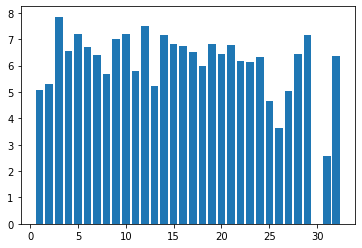

In [6]:
fixed_avg = [None]*num_inspectors
for i in range(num_inspectors):
    fixed_avg[i] = average_scores[i] - 90

plot.bar(indices, fixed_avg)

This shows some level of difference among the grading tendencies of inspectors as inspectors 31 and 26 have much lower average scores than the rest. However, this is not enough to understand their scoring ditributions and as there is a large difference between an A, B, and C I will make 3 graphs to see how often they each give those scores.

Text(0, 0.5, 'number of grades')

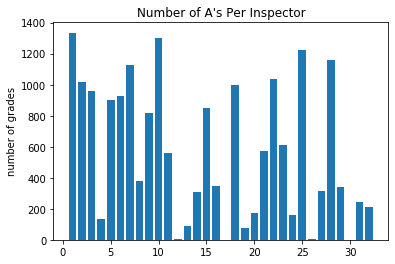

In [7]:
plot.bar(indices,num_As)
plot.title("Number of A's Per Inspector")
plot.ylabel("number of grades")

Text(0, 0.5, 'number of grades')

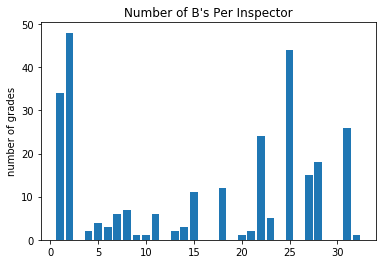

In [8]:
plot.bar(indices,num_Bs)
plot.title("Number of B's Per Inspector")
plot.ylabel("number of grades")

Text(0, 0.5, 'number of grades')

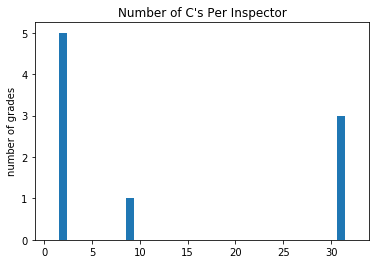

In [9]:
plot.bar(indices,num_Cs)
plot.title("Number of C's Per Inspector")
plot.ylabel("number of grades")

Only inspectors 2, 9, and 31 have failed any inspections. The one fail by inspector 9 can be chalked up to a bad restaurant but it is the 3 from inspector 31 and 2 from inspector 2 that are the most interesting. When looking at the number of B's those inspectors gave, inspector 2 has the most B's as well with inspector 31 also having a relatively high number of B's. Inspectors 31 and 2 clearly give much lower scores than other inspectors with inspector 2 having the most notably low average scores.

In [10]:
print("Inspector 2")
print("Avg: " + str(average_scores[1]))
print("A: " + str(num_As[1]))
print("B: " + str(num_Bs[1]))
print("C: " + str(num_Cs[1]))
print("Inspector 31")
print("Avg: " + str(average_scores[30]))
print("A: " + str(num_As[30]))
print("B: " + str(num_Bs[30]))
print("C: " + str(num_Cs[30]))

Inspector 2
Avg: 95.28684701492537
A: 1019
B: 48
C: 5
Inspector 31
Avg: 92.57407407407408
A: 241
B: 26
C: 3


Interestingly, inspector 31 actually has a lower average score than inspector 2 despite having less overall B's and C's given. This is because inspector 31 has completed less inspections than inspector 2 thus the large number of low scores will bring down his average much more than it would the score of inspector 2, who has completed considerably more inspections. 

# Ethics & Privacy

The data contains no personal information of any of the inspectors. It only identifies them by their inspector_id which cannpt be used to find more of their personal information. The only data used in this analysis is the inspectors id and the score given so there is no potential for unethical data. The identification info for the inspector is simply to keep the ratings in order. The analysis contains no ethical or privacy issues, the data collected and analyzed should not have any detrimental effect.

# Conclusion & Discussion

It can be concluded from the data that there is notable variation in the average ratings of inspectors and there are outliers who give more low ratings than the other inspectors. My hypothesis was incorrect in that the range of average scores was less than 10. The outlier inspectors were an unexpected but understandable data point that shows that most inspectors score around the same with just a small amount of exceptions.